Métricas de evaluación (conjunto de entrenamiento):
MSE: 0.5540610949446222
RMSE: 0.7443528027384744
MAE: 0.5510147398378406
R^2: 0.1598107297921063
R^2 ajustado: 0.1591527898780829
--------------------------------------------
Métricas de evaluación (conjunto de prueba):
MSE: 0.5414207827433373
RMSE: 0.7358130080009032
MAE: 0.5372552548288357
R^2: 0.10601315542895795
R^2 ajustado: 0.10320187604351438


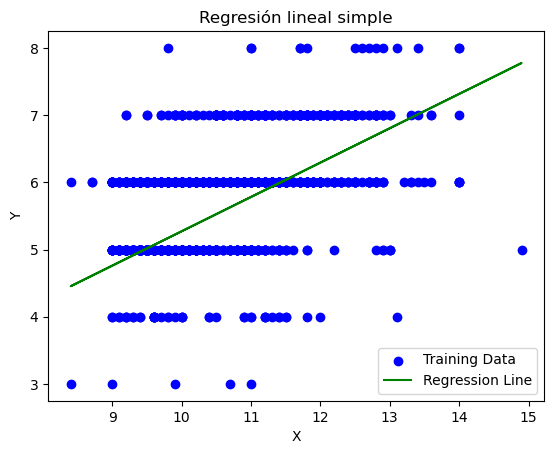

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('winequality-red.csv', sep=';')

# División de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# Extrae las características y las etiquetas de entrenamiento y prueba
train_X = train_data['alcohol'].values
train_y = train_data['quality'].values
test_X = test_data['alcohol'].values
test_y = test_data['quality'].values

# Función de entrenamiento utilizando descenso de gradiente por lotes
def train_linear_regression(X, y, learning_rate, num_iterations):
    # Inicializa los parámetros del modelo
    theta0 = 0.0
    theta1 = 0.0
    m = len(X)

    # Descenso de gradiente
    for iteration in range(num_iterations):
        # Calcula las predicciones y el error
        y_pred = theta0 + theta1 * X
        error = y_pred - y

        # Actualiza los parámetros utilizando el gradiente
        theta0 -= (learning_rate / m) * np.sum(error)
        theta1 -= (learning_rate / m) * np.sum(error * X)

    return theta0, theta1

# Función de entrenamiento utilizando descenso de gradiente estocástico
def train_linear_regression_stochastic(X, y, learning_rate, num_iterations):
    # Inicializa los parámetros del modelo
    theta0 = 0.0
    theta1 = 0.0
    m = len(X)

    # Descenso de gradiente estocástico
    for _ in range(num_iterations):
        # Selecciona una muestra aleatoria
        random_index = np.random.randint(0, m)
        X_sample = X[random_index]
        y_sample = y[random_index]

        # Calcula la predicción y el error para la muestra seleccionada
        y_pred = theta0 + theta1 * X_sample
        error = y_pred - y_sample

        # Actualiza los parámetros utilizando el gradiente de la muestra seleccionada
        theta0 -= learning_rate * error
        theta1 -= learning_rate * error * X_sample

    return theta0, theta1
  
# Hiperparámetros del modelo
learning_rate = 0.01
num_iterations = 1000

# Entrena el modelo utilizando los datos de entrenamiento
theta0, theta1 = train_linear_regression_stochastic(train_X, train_y, learning_rate, num_iterations)
#theta0, theta1 = train_linear_regression(train_X, train_y, learning_rate, num_iterations)

# Función para hacer predicciones
def predict(X, theta0, theta1):
    return theta0 + theta1 * X

# Realiza predicciones en los conjuntos de entrenamiento y prueba
train_predictions = predict(train_X, theta0, theta1)
test_predictions = predict(test_X, theta0, theta1)

# Cálculo de las métricas de evaluación
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true, y_pred):
    return np.sqrt(mse(y_true, y_pred))

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    ssr = np.sum((y_true - y_pred) ** 2)
    sst = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssr / sst)

def adjusted_r_squared(y_true, y_pred, num_features):
    r2 = r_squared(y_true, y_pred)
    n = len(y_true)
    return 1 - ((1 - r2) * (n - 1) / (n - num_features - 1))

# Calcular métricas de evaluación en los conjuntos de entrenamiento y prueba
train_mse = mse(train_y, train_predictions)
train_rmse = rmse(train_y, train_predictions)
train_mae = mae(train_y, train_predictions)
train_r2 = r_squared(train_y, train_predictions)
train_adjusted_r2 = adjusted_r_squared(train_y, train_predictions, 1)

test_mse = mse(test_y, test_predictions)
test_rmse = rmse(test_y, test_predictions)
test_mae = mae(test_y, test_predictions)
test_r2 = r_squared(test_y, test_predictions)
test_adjusted_r2 = adjusted_r_squared(test_y, test_predictions, 1)

# Imprimir las métricas de evaluación
print("Métricas de evaluación (conjunto de entrenamiento):")
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("MAE:", train_mae)
print("R^2:", train_r2)
print("R^2 ajustado:", train_adjusted_r2)
print("--------------------------------------------")
print("Métricas de evaluación (conjunto de prueba):")
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("MAE:", test_mae)
print("R^2:", test_r2)
print("R^2 ajustado:", test_adjusted_r2)

# Gráfico de la regresión
plt.scatter(train_X, train_y, color='blue', label='Training Data')
#plt.scatter(test_X, test_y, color='red', label='Test Data')
plt.plot(train_X, train_predictions, color='green', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal simple')
plt.legend()
plt.show()